In [1]:
from scipy import ndimage
from skimage import filters
from skimage import util
import skimage.io as io
from skimage import exposure
from skimage import img_as_ubyte
from skimage import img_as_float

import matplotlib.pyplot as plt
import numpy as np

import os

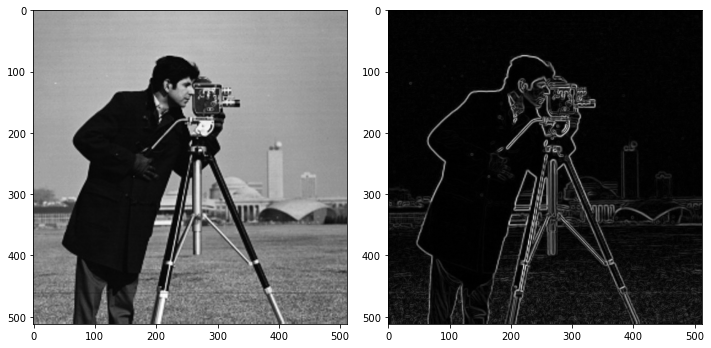

In [13]:
# roberts prewitt sobel 
dir_actual = os.getcwd()
imagenFilename = os.path.join(dir_actual,'Imagenes de pruebas','cameraman.jpg')

image_house = io.imread(imagenFilename,as_gray=True)

house_border = filters.sobel(image_house) 

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image_house,cmap=plt.cm.gray) 
ax[1].imshow(house_border, cmap=plt.cm.gray)
# ax[2].imshow(imagenPrueba[:,:,1], cmap=plt.cm.gray) 
# ax[3].imshow(imagenPrueba[:,:,2], cmap=plt.cm.gray) 
fig.tight_layout()
plt.show()

In [34]:
def faux(o,t): 
    return o[0]*np.cos(t) + o[1]*np.sin(t)

In [ ]:
def THough(img): 
    # rho -> [-100 y 100 ]
    valoresTE = np.linspace(-np.pi,np.pi,180)# te  -> [-pi y pi] 
    # vamos a partir el intervalo para te en 180 en cada grado 
    A = np.zeros((200,180))
    # proceso de binarizacion de la imagen de entrada 
    img_bin = filters.sobel(img) # suponemos que son 0 y 1 
    N,M = img_bin.shape 
    coordenadas = [(x,y) for x in range(N): for y in range(M) if img_bin[x,y]==1 ]
    
    for rho in np.range(100):
        for te in enumerate(valoresTE):
            
            A[rho,te] = 

In [18]:
N = 10
M = 10
img = np.random.randint(2,size = (N,M))

# Genera la lista de coordenadas (x, y) donde img_bin[x, y] == 1
coordenadas = [(x, y) for x in range(N) for y in range(M) if img[x, y] == 1]

In [33]:
faux(coordenadas[0],np.pi)

1.2246467991473532e-16

In [38]:
E = np.array([(0,-1),(1,2),(2,5)])

In [77]:
def f(E): # recibe coordenadas para luego calular los sinusoides
    # rho -> [-100 y 100 ]
    valoresTE = np.linspace(-np.pi,np.pi,180)# te  -> [-pi y pi] 
    # vamos a partir el intervalo para te en 180 en cada grado 
    #A = np.zeros((200,180))
    M = np.zeros((len(E),180))
    A = np.zeros((200,180))
    
    for i in range(len(E)): 
        for (j,te) in enumerate(valoresTE):
            M[i,j] = faux(E[i],te)
            A[int(np.round(M[i,j])),j] += 1
    
    for i in range(E.shape[0]): 
        plt.plot(valoresTE, M[i,:]) # Ejemplo usando la función seno
        
    plt.xlabel("Intervalo [-pi, pi]")
    #plt.ylabel("Sin(x)")
    #plt.title("Gráfico de la función Seno en el intervalo [-pi, pi]")
    plt.grid(True)
    plt.show()
    return A 

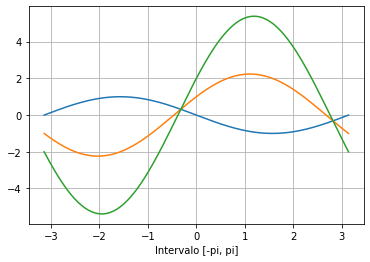

In [78]:
#rho = np.zeros((10,180))
#rho[0,0]=1
#rho[0]
acu=f(E)

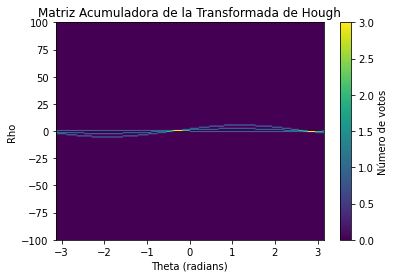

Línea detectada: rho = -0.5025125628140756, theta = 2.7905767146412126 (en radianes)


In [89]:
# Coordenadas de los puntos
E = np.array([(0, -1), (1, 2), (2, 5)])

# Límites de rho y theta
rho_min, rho_max = -100, 100
theta_min, theta_max = -np.pi, np.pi

# Definir discretización
num_rho = 200  # Número de valores para rho
num_theta = 180  # Número de valores para theta

# Crear la matriz acumuladora
rho_values = np.linspace(rho_min, rho_max, num_rho)
theta_values = np.linspace(theta_min, theta_max, num_theta)
accumulator = np.zeros((num_rho, num_theta))

# Transformada de Hough
for x, y in E:
    for theta_index in range(num_theta):
        theta = theta_values[theta_index]
        rho = x * np.cos(theta) + y * np.sin(theta)
        
        # Encontrar el índice de rho en la matriz acumuladora
        rho_index = np.argmin(np.abs(rho_values - rho))
        
        # Incrementar el valor en la matriz acumuladora
        accumulator[rho_index, theta_index] += 1

# Encontrar el índice del valor máximo en la matriz acumuladora
max_index = np.unravel_index(np.argmax(accumulator), accumulator.shape)
max_rho_index, max_theta_index = max_index
rho_detected = rho_values[max_rho_index]
theta_detected = theta_values[max_theta_index]

# Calcular la pendiente (m) y la intersección (b)
m = -np.cos(theta_detected) / np.sin(theta_detected)
b = rho_detected / np.sin(theta_detected)

# Visualizar la matriz acumuladora
plt.imshow(accumulator, extent=[theta_min, theta_max, rho_min, rho_max], aspect='auto', origin='lower')
plt.xlabel('Theta (radians)')
plt.ylabel('Rho')
plt.title('Matriz Acumuladora de la Transformada de Hough')
plt.colorbar(label='Número de votos')
plt.show()

# Mostrar los parámetros de la línea detectada
max_rho_index, max_theta_index = np.unravel_index(np.argmax(accumulator), accumulator.shape)
rho_detected = rho_values[max_rho_index]
theta_detected = theta_values[max_theta_index]

print(f"Línea detectada: rho = {rho_detected}, theta = {theta_detected} (en radianes)")


In [86]:
max_in = np.unravel_index(np.argmax(accumulator),accumulator.shape)

In [90]:
print(m)
print(b)

2.7308956509257074
-1.4614211881437902
